In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import seaborn as sns

In [113]:
train=pd.read_csv("training.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(7049, 31)

In [36]:
train.head(2)          

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212..."


In [11]:
train['Image']=train['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [12]:
train.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212..."


In [13]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [14]:
train=train.dropna()
train.shape

(2140, 31)

In [114]:
cols=train.columns

In [25]:
x=np.vstack(train['Image'].values)
x=x.astype(np.float32)
x.shape

(2140, 9216)

In [38]:
y=train[train.columns[:-1]].values
y=y.astype(np.float32)
y.shape

(2140, 30)

In [39]:
x,y=shuffle(x,y, random_state=20)

In [41]:
x[1].shape

(9216,)

In [42]:
x=x.reshape(-1, 96, 96, 1)
x[1].shape

(96, 96, 1)

In [43]:
x.shape

(2140, 96, 96, 1)

In [115]:
cols=np.array(list(cols[:-1]))

In [116]:
cols

array(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y',
       'mouth_right_corner_x', 'mouth_right_corner_y',
       'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'],
      dtype='<U25')

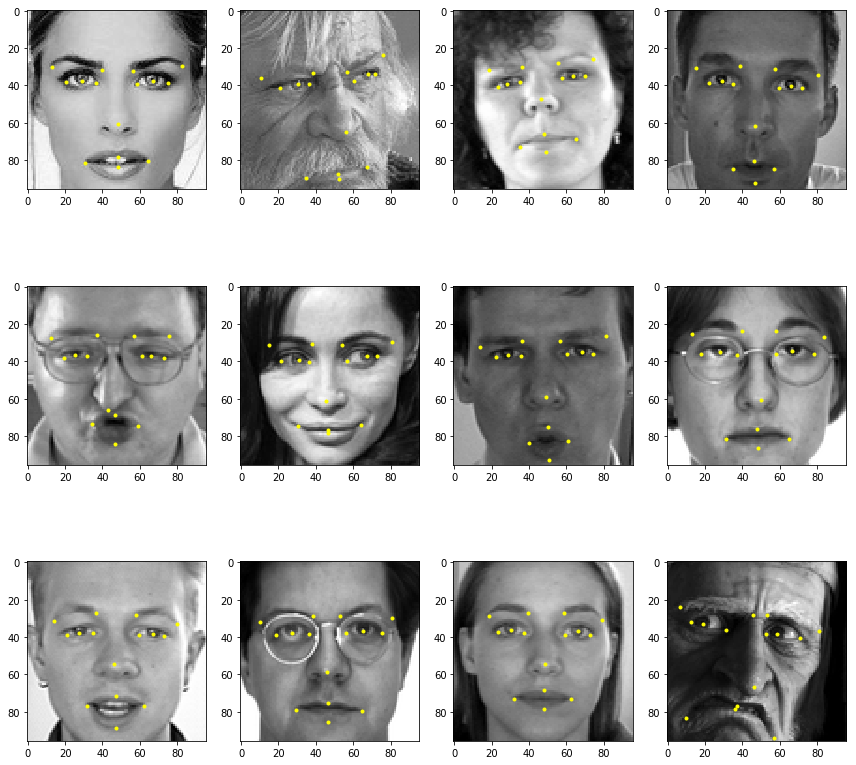

In [61]:
plt.figure(0, figsize=(12,12))
j=1
for i in range(30,42):
    plt.subplot(3,4,j)
    plt.imshow(x[i, :, :, 0], cmap='gray')
    plt.scatter(y[i, range(0,30,2)], y[i, range(1,30,2)], marker='.', color='yellow')
    j+=1

plt.tight_layout()    
plt.show()

In [62]:
test.shape

(1783, 2)

In [67]:
test['Image']=test['Image'].apply(lambda im: np.fromstring(im, sep=' '))

In [70]:
test.isnull().sum()

test=test.dropna()
test.shape

(1783, 2)

In [73]:
x_test=np.vstack(test['Image'].values)
x_test=x_test.astype(np.float32)
x_test.shape

(1783, 9216)

In [74]:
x_test=x_test.reshape(-1, 96, 96, 1)
x_test.shape

(1783, 96, 96, 1)

In [77]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Conv2D, Activation, Dropout, MaxPool2D, Dense, Flatten, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [83]:
model=Sequential([
    BatchNormalization(input_shape=(96,96,1)),
    Conv2D(16, 5, input_shape=(96,96,1), padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    
    Conv2D(32, 5, padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    
    Conv2D(64, 3, padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    
    Conv2D(128, 3, padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    Conv2D(256, 3, padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    
    Conv2D(512, 1, padding='same'),
    Activation('relu'),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(30)
    
    
    
])

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 16)        416       
_________________________________________________________________
activation_10 (Activation)   (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 32)        12832     
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 32)        0         
__________

In [85]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [87]:
checkpointer=ModelCheckpoint('keypoint.h5', save_best_only='True', verbose=1)

In [90]:
hist=model.fit(x,y, epochs=300, validation_split=0.2, callbacks=[checkpointer], verbose=1)

model.save('trained_face.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/300
1696/1712 [============================>.] - ETA: 0s - loss: 689.3264 - acc: 0.3756
Epoch 00001: val_loss improved from inf to 84.49999, saving model to keypoint.h5
1712/1712 [==============================] - 15s 9ms/step - loss: 683.6137 - acc: 0.3785 - val_loss: 84.5000 - val_acc: 0.7079
Epoch 2/300
1696/1712 [============================>.] - ETA: 0s - loss: 69.9671 - acc: 0.7034
Epoch 00002: val_loss improved from 84.49999 to 63.71259, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 69.7109 - acc: 0.7044 - val_loss: 63.7126 - val_acc: 0.7079
Epoch 3/300
1696/1712 [============================>.] - ETA: 0s - loss: 44.0773 - acc: 0.7052
Epoch 00003: val_loss improved from 63.71259 to 43.66308, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 44.0718 - acc: 0.7044 - val_loss: 43.6631 - val_acc: 0.7079
Epoch 4/300
1696/1712 [==============

1696/1712 [============================>.] - ETA: 0s - loss: 9.5280 - acc: 0.7064
Epoch 00030: val_loss improved from 9.68676 to 9.56519, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 9.5734 - acc: 0.7044 - val_loss: 9.5652 - val_acc: 0.7079
Epoch 31/300
1696/1712 [============================>.] - ETA: 0s - loss: 9.5977 - acc: 0.7040
Epoch 00031: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 9.5900 - acc: 0.7044 - val_loss: 10.3527 - val_acc: 0.7079
Epoch 32/300
1696/1712 [============================>.] - ETA: 0s - loss: 9.6686 - acc: 0.7052
Epoch 00032: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 9.6498 - acc: 0.7044 - val_loss: 10.3627 - val_acc: 0.7079
Epoch 33/300
1696/1712 [============================>.] - ETA: 0s - loss: 9.3448 - acc: 0.7040
Epoch 00033: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss:

Epoch 61/300
1696/1712 [============================>.] - ETA: 0s - loss: 8.0114 - acc: 0.6875
Epoch 00061: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 8.0072 - acc: 0.6857 - val_loss: 8.5839 - val_acc: 0.6869
Epoch 62/300
1696/1712 [============================>.] - ETA: 0s - loss: 8.7536 - acc: 0.6940
Epoch 00062: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 8.7456 - acc: 0.6933 - val_loss: 9.1257 - val_acc: 0.7079
Epoch 63/300
1696/1712 [============================>.] - ETA: 0s - loss: 7.9739 - acc: 0.6922
Epoch 00063: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 7.9905 - acc: 0.6922 - val_loss: 8.2237 - val_acc: 0.6776
Epoch 64/300
1696/1712 [============================>.] - ETA: 0s - loss: 7.7620 - acc: 0.6910
Epoch 00064: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 7.7570 - acc: 0.6916 - val_loss: 9

Epoch 92/300
1696/1712 [============================>.] - ETA: 0s - loss: 5.7485 - acc: 0.7034
Epoch 00092: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 5.7365 - acc: 0.7044 - val_loss: 7.7868 - val_acc: 0.6729
Epoch 93/300
1696/1712 [============================>.] - ETA: 0s - loss: 5.5480 - acc: 0.7005
Epoch 00093: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 5.5641 - acc: 0.6986 - val_loss: 6.1676 - val_acc: 0.6776
Epoch 94/300
1696/1712 [============================>.] - ETA: 0s - loss: 5.7004 - acc: 0.7005
Epoch 00094: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 5.7071 - acc: 0.7009 - val_loss: 7.7801 - val_acc: 0.6869
Epoch 95/300
1696/1712 [============================>.] - ETA: 0s - loss: 5.8041 - acc: 0.7081
Epoch 00095: val_loss improved from 5.87834 to 5.84421, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/s

1696/1712 [============================>.] - ETA: 0s - loss: 4.1541 - acc: 0.7258
Epoch 00122: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 4.1510 - acc: 0.7261 - val_loss: 6.7766 - val_acc: 0.7243
Epoch 123/300
1696/1712 [============================>.] - ETA: 0s - loss: 3.9864 - acc: 0.7241
Epoch 00123: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 3.9841 - acc: 0.7255 - val_loss: 4.5668 - val_acc: 0.7126
Epoch 124/300
1696/1712 [============================>.] - ETA: 0s - loss: 3.6454 - acc: 0.7329
Epoch 00124: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 3.6511 - acc: 0.7319 - val_loss: 4.7741 - val_acc: 0.7079
Epoch 125/300
1696/1712 [============================>.] - ETA: 0s - loss: 3.4232 - acc: 0.7347
Epoch 00125: val_loss improved from 4.53402 to 4.49276, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss

Epoch 153/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.5221 - acc: 0.7488
Epoch 00153: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 2.5280 - acc: 0.7494 - val_loss: 4.0872 - val_acc: 0.7220
Epoch 154/300
1696/1712 [============================>.] - ETA: 0s - loss: 3.0356 - acc: 0.7559
Epoch 00154: val_loss improved from 3.87302 to 3.79434, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 3.0380 - acc: 0.7553 - val_loss: 3.7943 - val_acc: 0.7266
Epoch 155/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.5964 - acc: 0.7476
Epoch 00155: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 2.6220 - acc: 0.7482 - val_loss: 4.6866 - val_acc: 0.7220
Epoch 156/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.4200 - acc: 0.7476
Epoch 00156: val_loss improved from 3.79434 to 3.70160, saving model to keypoint.h5
171

1696/1712 [============================>.] - ETA: 0s - loss: 1.9358 - acc: 0.7842
Epoch 00183: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.9348 - acc: 0.7827 - val_loss: 3.3894 - val_acc: 0.7453
Epoch 184/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.0480 - acc: 0.7866
Epoch 00184: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 2.0557 - acc: 0.7850 - val_loss: 4.7413 - val_acc: 0.7617
Epoch 185/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.4866 - acc: 0.7824
Epoch 00185: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 2.4808 - acc: 0.7827 - val_loss: 3.5724 - val_acc: 0.7734
Epoch 186/300
1696/1712 [============================>.] - ETA: 0s - loss: 2.3411 - acc: 0.7830
Epoch 00186: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 2.3432 - acc: 0.7833 - val_loss: 3.6895 - va

Epoch 215/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.8815 - acc: 0.8178
Epoch 00215: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.8795 - acc: 0.8178 - val_loss: 3.3687 - val_acc: 0.7710
Epoch 216/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.5256 - acc: 0.8308
Epoch 00216: val_loss improved from 2.98727 to 2.94840, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 1.5290 - acc: 0.8324 - val_loss: 2.9484 - val_acc: 0.7967
Epoch 217/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.3810 - acc: 0.8367
Epoch 00217: val_loss improved from 2.94840 to 2.86915, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 1.3794 - acc: 0.8359 - val_loss: 2.8692 - val_acc: 0.7921
Epoch 218/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.5713 - acc: 0.8267
Epoch 00218: val_loss did not improve
171

Epoch 246/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.2684 - acc: 0.8514
Epoch 00246: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.2692 - acc: 0.8522 - val_loss: 2.8438 - val_acc: 0.8014
Epoch 247/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.1602 - acc: 0.8508
Epoch 00247: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.1583 - acc: 0.8511 - val_loss: 2.9850 - val_acc: 0.8037
Epoch 248/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.2271 - acc: 0.8538
Epoch 00248: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.2290 - acc: 0.8540 - val_loss: 2.9189 - val_acc: 0.7921
Epoch 249/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.4122 - acc: 0.8526
Epoch 00249: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.4109 - acc: 0.8522 - val_los

1696/1712 [============================>.] - ETA: 0s - loss: 1.1519 - acc: 0.8779
Epoch 00277: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 1.1551 - acc: 0.8768 - val_loss: 2.9470 - val_acc: 0.8014
Epoch 278/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.1000 - acc: 0.8803
Epoch 00278: val_loss improved from 2.71228 to 2.65426, saving model to keypoint.h5
1712/1712 [==============================] - 8s 5ms/step - loss: 1.0988 - acc: 0.8808 - val_loss: 2.6543 - val_acc: 0.7991
Epoch 279/300
1696/1712 [============================>.] - ETA: 0s - loss: 0.9481 - acc: 0.8785
Epoch 00279: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss: 0.9483 - acc: 0.8779 - val_loss: 2.7408 - val_acc: 0.8131
Epoch 280/300
1696/1712 [============================>.] - ETA: 0s - loss: 1.1417 - acc: 0.8697
Epoch 00280: val_loss did not improve
1712/1712 [==============================] - 8s 5ms/step - loss

In [91]:
model.load_weights('keypoint.h5')
y_test=model.predict(x_test)

y_test.shape

(1783, 30)

In [93]:
id_lookup = pd.read_csv("IdLookupTable.csv")
out = id_lookup[["ImageId", "FeatureName"]]
out.head()

,ImageId,FeatureName
0,1,left_eye_center_x
1,1,left_eye_center_y
2,1,right_eye_center_x
3,1,right_eye_center_y
4,1,left_eye_inner_corner_x


In [120]:

y_res = []
j = 0
k = 0
m = 0
for i in range(1, 1784):
    img = np.array(out[out["ImageId"]==i])
    if img.shape[0] == 30:
        y_res += list(y_test[i-1,:])
        j += 30
    else:
        slice_img = y_test[i-1, :]
        y_res += [slice_img[j] for j in range(30) if cols[j] in img[:, 1]]
        k += len([slice_img[j] for j in range(30) if cols[j] in img[:, 1]])
y_res = np.array(y_res)
y_res.shape

(27124,)

In [122]:
result_dict = {
    "RowId": range(1,27125),
    "Location": y_res%96
}
result_df = pd.DataFrame(result_dict, )
result_df.to_csv("result.csv", index=False, columns=["RowId", "Location"])